In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

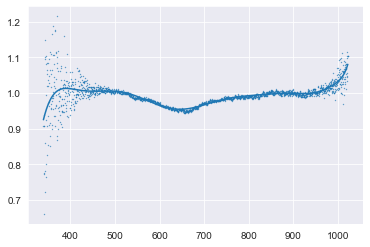

In [4]:
# faraday 校正
fara_prf = pd.read_csv("./data/big-glass-big/proof_faraday.csv")
order = 21
x_prf = fara_prf["Wavelength"].values
x_prf_norm = (x_prf-np.min(x_prf))/(np.max(x_prf)-np.min(x_prf))
y = fara_prf["c"].values
Phi = x_prf_norm.reshape([-1, 1]) ** np.arange(order).reshape([1,-1])
W = np.linalg.inv(Phi.T @ Phi + 1.e-9*np.eye(order)) @ Phi.T @ y.reshape([-1, 1])

plt.scatter(x_prf, y, s=0.1)
plt.plot(x_prf, Phi@W)

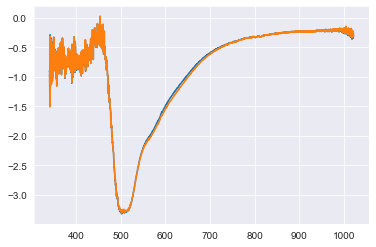

In [20]:
path = "data/big-glass-big/Ms   bi2.5nigg 10 layers glass sub..xlsx"
data = pd.read_excel(path)
x = data["Wavelength"].values
r = data["R"].values
x_norm = (x-np.min(x_prf))/(np.max(x_prf)-np.min(x_prf))
prf = (x_norm.reshape([-1, 1]) ** np.arange(order).reshape([1, -1])) @ W
plt.plot(x, r)
plt.plot(x, r/prf.reshape([-1]))
data["R_prf"] = r/prf.reshape([-1])
data.to_excel(path)

In [ ]:
# 楕円率校正